In [ ]:
# import the necessary packages
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
input_shape = (IMG_ROWS, IMG_COLS, 1)

In [ ]:
# data: shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# K.set_image_dim_ordering("th")

# consider them as float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)


print(x_train.shape)

60000 train samples
10000 test samples
(60000, 28, 28, 1)


In [ ]:
model = Sequential()
#CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# CONV => RELU => POOL
model.add(Conv2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# a softmax classifier
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))

In [ ]:
# initialize the optimizer and model
#model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

print(x_train.shape)
print(y_train.shape)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/10
375/375 [==============================] - 88s 235ms/step - loss: 0.1825 - accuracy: 0.9434 - val_loss: 0.0601 - val_accuracy: 0.9810
Epoch 2/10
375/375 [==============================] - 87s 232ms/step - loss: 0.0494 - accuracy: 0.9841 - val_loss: 0.0466 - val_accuracy: 0.9863
Epoch 3/10
375/375 [==============================] - 88s 234ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0417 - val_accuracy: 0.9878
Epoch 4/10
375/375 [==============================] - 88s 234ms/step - loss: 0.0238 - accuracy: 0.9917 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 5/10
375/375 [==============================] - 94s 250ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0323 - val_accuracy: 0.9901
Epoch 6/10
375/375 [==============================] - 88s 235ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0370 - val_accuracy: 0.9904
Epoch 7/10
375/375 [==============================] - 87s 232ms/step - loss: 0.0103 - accuracy: 0.9

In [ ]:
score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 23s 2ms/step
('\nTest score:', 0.03123832540251642)
('Test accuracy:', 0.9909)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


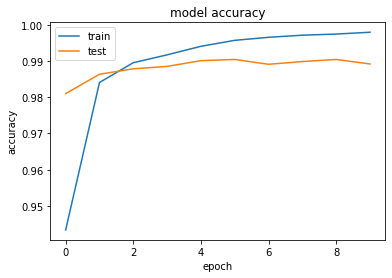

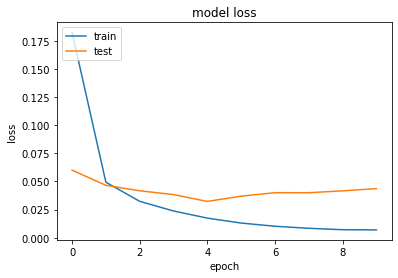

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from keras.models import load_model
model.save('lenet_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model